### Label Encoder

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.DataFrame(
    {'A' : ['a', 'b','c', 'a', 'b'] ,
    'B' : ['1', '2', '3', '1', '0']}
)

df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [5]:
le = LabelEncoder()
le.fit(df['A'])

LabelEncoder()

In [6]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [7]:
le.transform(df['A'])

array([0, 1, 2, 0, 1])

In [8]:
df['le_A'] = le.transform(df['A'])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [9]:
le.inverse_transform(df['le_A'])

array(['a', 'b', 'c', 'a', 'b'], dtype=object)

### Min - Max Scaler

In [11]:
df = pd.DataFrame({
    'A':[10, 20, -10, 0, 25],
    'B':[1, 2, 3, 1, 0]
})

df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [14]:
mms.data_max_, mms.data_min_, mms.data_range_

(array([25.,  3.]), array([-10.,   0.]), array([35.,  3.]))

In [15]:
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [16]:
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

### Standard Scaler

In [17]:
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [19]:
# 각 컬럼의 평균 값, 표준 편차 값

ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [20]:
# 평균 = 0, 표준 편차 = 1인 데이터로 정규화 시킨 것

df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

### Robust Scaler

In [21]:
df = pd.DataFrame({
    'A':[-0.1, 0., 0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5]
})
df

,A
0,-0.1
1,0.0
2,0.1
3,0.2
4,0.3
5,0.4
6,1.0
7,1.1
8,5.0


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [23]:
df_scaler = df.copy()

df_scaler['MinMax'] = mms.fit_transform(df)
df_scaler['Standard'] = ss.fit_transform(df)
df_scaler['Robust'] = rs.fit_transform(df)

In [24]:
df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


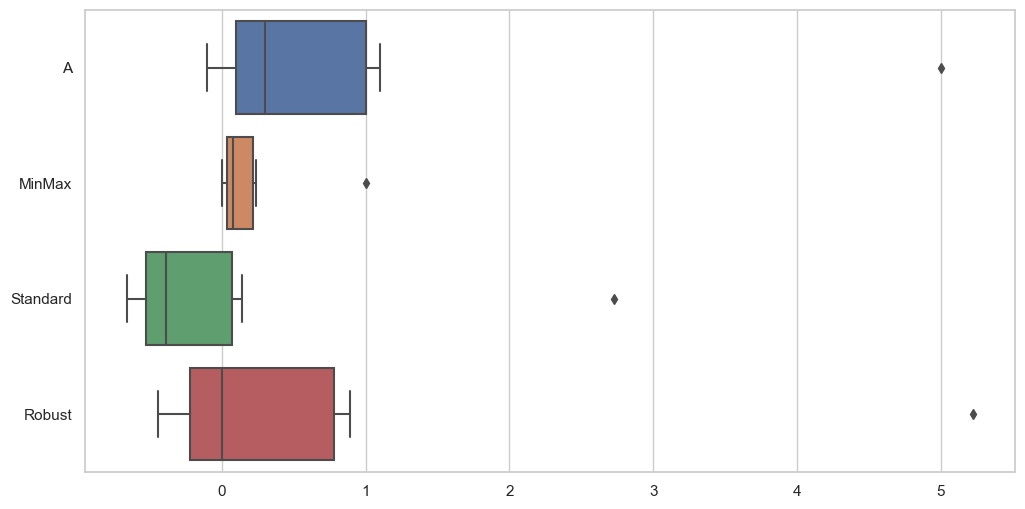

In [27]:
# boxplot을 이용한 이해 돕기

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,6))
sns.boxplot(data=df_scaler, orient='h')

plt.show()

### 와인 데이터 분석

In [32]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' +\
                                    '/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' +\
                                    '/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

In [33]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [36]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [60]:
# 레드 와인, 화이트 화인의 구조가 같아 분석 용이를 위해 데이터 결합

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


In [61]:
# 데이터 확인

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0


In [62]:
# 등급 데이터 확인

wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [63]:
# 등급 데이터 histogram

import plotly.express as px

fig = px.histogram(wine, x='quality', width=1300, height=350)
fig.show()

In [64]:
# 등급 데이터 histogram by color

fig = px.histogram(wine, x='quality', color = 'color', width=1300, height=350)
fig.show()

### 레드/화이트 와인 분류기

In [65]:
# 데이터와 답지 분리

X = wine.drop(['color'], axis=1) # 레드/화이트를 분류하는 것이기에 색상은 답이 되므로 제외한 데이터셋이 요구됨
y = wine['color'] # 색상은 답

In [66]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

np.unique(y_train, return_counts=True)

(array([0., 1.]), array([3913, 1284], dtype=int64))

In [67]:
# 훈련용 / 테스트용이 어느 정도 구분 되었는지 확인

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=X_train['quality'], name = 'Train'))
fig.add_trace(go.Histogram(x=X_test['quality'], name = 'Test'))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

In [68]:
# Decision Tree training

from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [69]:
# 학습 결과 확인

from sklearn.metrics import accuracy_score

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Accuray : ', accuracy_score(y_train, y_pred_tr))
print('Test Accuray : ', accuracy_score(y_test, y_pred_test))

Train Accuray :  0.9553588608812776
Test Accuray :  0.9569230769230769


### 와인 데이터 전처리

In [72]:
# 여러 항목 Boxplot 확인

fig = go.Figure()
fig.add_trace(go.Box(y=X['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X['quality'], name='quality'))

fig.show()

In [73]:
# minmax/standard scaler 적용, cost function 최적화
# decision tree 에는 따로 의미를 가지지 않음

from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()
ss = StandardScaler()

mms.fit(X)
ss.fit(X)

X_mms = mms.transform(X)
X_ss = ss.transform(X)

X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)


In [74]:
# Boxplot 확인 (minmaxscaled)

fig = go.Figure()
fig.add_trace(go.Box(y=X_mms_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X_mms_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X_mms_pd['quality'], name='quality'))

fig.show()

In [75]:
# Boxplot 확인 (standardscaled)

fig = go.Figure()
fig.add_trace(go.Box(y=X_ss_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X_ss_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X_ss_pd['quality'], name='quality'))

fig.show()

* 이러한 전처리는 컬럼마다 다른 분산 / 평균 등으로 인해 한 눈에 데이터를 보기 어렵고 다양한 모델 중 적합한 것을 적용하기 어려울 때 사용함
* Decision Tree는 이런 전처리의 영향을 거의 받지 않음

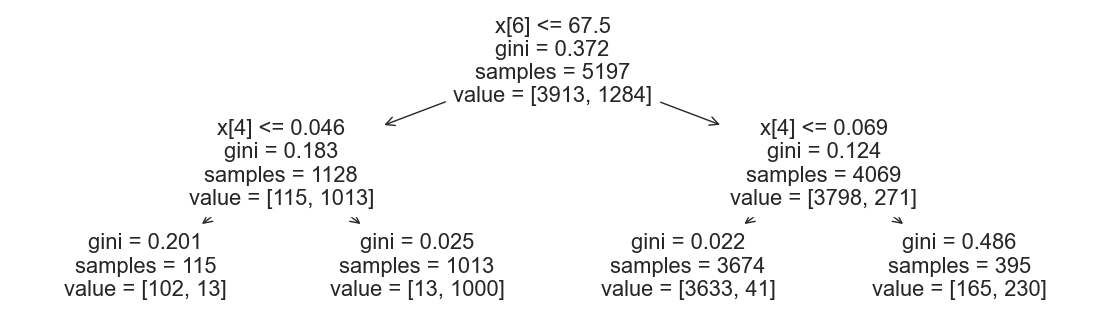

In [80]:
# Decision Tree의 결정 요소 확인

from sklearn.tree import plot_tree

plt.figure(figsize=(14,4))
plot_tree(wine_tree);

In [77]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

* 첫번째 결정 인자: total sulfur dioxide
* 두번째 결정 인자: chlorides

In [78]:
# 수치 중요도 확인

dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

### 맛의 이진 분류

In [89]:
# 등급에 따라 맛을 이진 분류 (물론 등급에 따라 맛을 나누는 것은 말이 안되는 기준이지만 공부를 위함)

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0


In [90]:
# 맛에 의한 분류 (1): '맛'이라는 답과 나머지 데이터 분리 및 훈련/검증용 분리

X = wine.drop(['taste'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree_t = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree_t.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [91]:
# 맛에 의한 분류 (2): 훈련/검증용 데이터에 일치율 확인

yt_pred_tr = wine_tree_t.predict(X_train)
yt_pred_test = wine_tree_t.predict(X_test)

print('Train Accuray : ', accuracy_score(y_train, yt_pred_tr))
print('Test Accuray : ', accuracy_score(y_test, yt_pred_test))

Train Accuray :  1.0
Test Accuray :  1.0


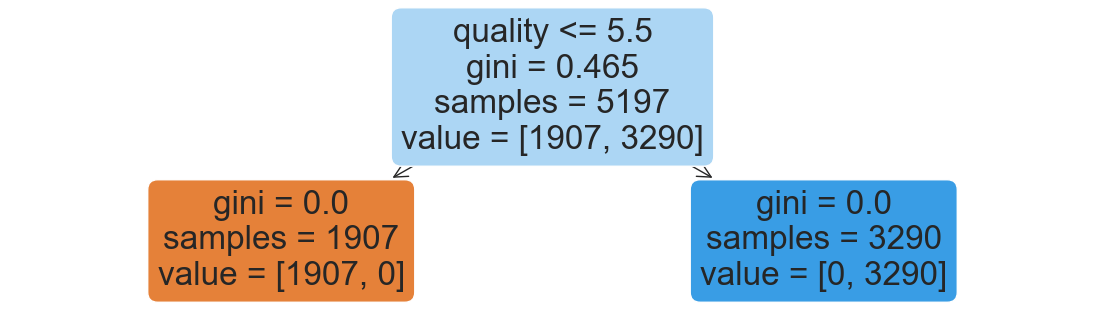

In [92]:
# 맛에 의한 분류 (3): 100%일 경우 계산 착오일 확률이 매우 큼, 결정 인자 확인

import sklearn.tree as tree

plt.figure(figsize=(14,4))
tree.plot_tree(wine_tree_t, feature_names=X.columns, rounded=True, filled=True)
plt.show()

In [93]:
# 맛에 의한 분류 (4): taste가 quality 를 의미하므로 quality 도 제거한 뒤 다시 진행

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree_t = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree_t.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [94]:
# 맛에 의한 분류 (5): decision tree 일치율 확인

yt_pred_tr = wine_tree_t.predict(X_train)
yt_pred_test = wine_tree_t.predict(X_test)

print('Train Accuray : ', accuracy_score(y_train, yt_pred_tr))
print('Test Accuray : ', accuracy_score(y_test, yt_pred_test))

Train Accuray :  0.7294593034442948
Test Accuray :  0.7161538461538461


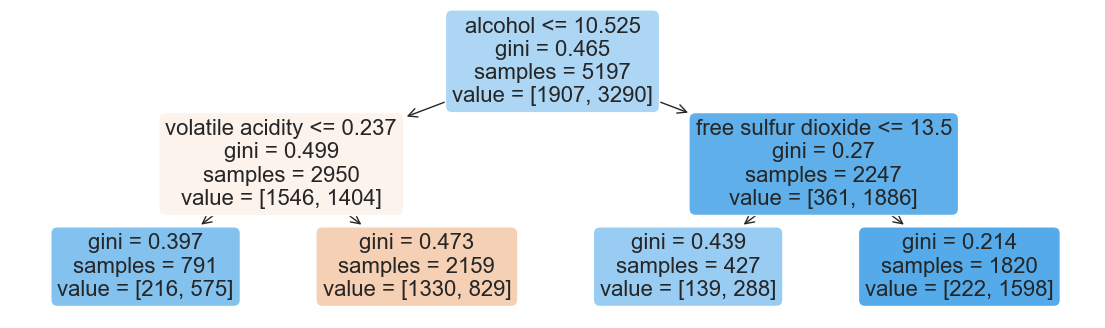

In [95]:
# 맛에 의한 분류 (6): decision tree 결정 인자 재확인

plt.figure(figsize=(14,4))
tree.plot_tree(wine_tree_t, feature_names=X.columns, rounded=True, filled=True)
plt.show()

### Pipeline

In [96]:
# 와인 데이터 다시 불러오기

import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' +\
                                    '/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' +\
                                    '/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

X = wine.drop(['color'], axis = 1)
y = wine['color']


* 레드 / 화이트 와인 분류기의 동작 process
  1. StandardScaler (scaler) [pipeline 내부]
  2. test_train_split [pipeline 외부]
  3. DecisionTreeClassifier (clf) [pipeline 내부] 

In [97]:
# 파이프라인 구축

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

In [101]:
# 파이프 라인 구동 순서 확인

pipe.steps, pipe.steps[0], pipe.steps[1]

([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())],
 ('scaler', StandardScaler()),
 ('clf', DecisionTreeClassifier()))

In [102]:
# 파이프라인 parameter 변경

pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [103]:
# 훈련 / 검증 데이터셋 분리는 파이프라인 내부에서 일어나지 않으므로 직접 코딩 필요

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=13)

X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3437,6.7,0.40,0.22,8.8,0.052,24.0,113.0,0.99576,3.22,0.45,9.4,5
2124,7.7,0.39,0.28,4.9,0.035,36.0,109.0,0.99180,3.19,0.58,12.2,7
3005,6.9,0.30,0.36,0.9,0.037,40.0,156.0,0.98968,3.08,0.36,12.1,6
2436,6.9,0.43,0.28,9.4,0.056,29.0,183.0,0.99594,3.17,0.43,9.4,5
444,6.9,0.24,0.36,20.8,0.031,40.0,139.0,0.99750,3.20,0.33,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4710,5.4,0.33,0.31,4.0,0.030,27.0,108.0,0.99031,3.30,0.43,12.2,7
44,6.7,0.23,0.26,1.4,0.060,33.0,154.0,0.99340,3.24,0.56,9.5,6
1987,8.1,0.22,0.28,7.7,0.043,57.0,176.0,0.99540,3.12,0.55,10.0,5
2422,6.2,0.44,0.18,7.7,0.096,28.0,210.0,0.99771,3.56,0.72,9.2,5


In [104]:
# 파이프라인에 만든 데이터 셋 적용

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [105]:
# 학습 결과 확인

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Accuray : ', accuracy_score(y_train, y_pred_tr))
print('Test Accuray : ', accuracy_score(y_test, y_pred_test))

Train Accuray :  0.9657494708485664
Test Accuray :  0.9576923076923077


### 교차 검증

In [107]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)

print(kf.get_n_splits(X))
print(kf)

for train_idx, test_idx in kf.split(X):
    print('--- idx')
    print(train_idx, test_idx)
    print('--- train data')
    print(X[train_idx])
    print('--- val data')
    print(X[test_idx])


2
KFold(n_splits=2, random_state=None, shuffle=False)
--- idx
[2 3] [0 1]
--- train data
[[1 2]
 [3 4]]
--- val data
[[1 2]
 [3 4]]
--- idx
[0 1] [2 3]
--- train data
[[1 2]
 [3 4]]
--- val data
[[1 2]
 [3 4]]


#### KFold 이용한 교차검증

In [108]:
# 와인 데이터 다시 불러오기 및 맛 카테고리 재구현

import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' +\
                                    '/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' +\
                                    '/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [109]:
# 사용자 지정한 맛을 기준으로 학습, 결과 확인

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Accuray : ', accuracy_score(y_train, y_pred_tr))
print('Test Accuray : ', accuracy_score(y_test, y_pred_test))

Train Accuray :  0.7294593034442948
Test Accuray :  0.7161538461538461


In [110]:
# 위에서 나온 일치율을 교차검증 준비

from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

In [111]:
# 데이터셋을 어떻게 나누는지 확인

for train_idx, test_idx in kfold.split(X):
    print(len(train_idx), len(test_idx))

5197 1300
5197 1300
5198 1299
5198 1299
5198 1299


In [112]:
# 각각의 fold를 학습후 일치율 확인

cv_accuracy = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]     # for 반복문 진행에 따라 각 idx 해당 정보를 할당
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)                        # 학습 진행
    pred = wine_tree_cv.predict(X_test)                       # 학습 결과 할당
    cv_accuracy.append(accuracy_score(y_test, pred))          # 학습 결과 확인

cv_accuracy


[0.6007692307692307,
 0.6884615384615385,
 0.7090069284064665,
 0.7628945342571208,
 0.7867590454195535]

In [113]:
# 전체 fold 일치율 평균

np.mean(cv_accuracy)

0.709578255462782

#### Stratified KFold 이용한 교차 검증

In [118]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv2 = DecisionTreeClassifier(max_depth=2, random_state=13)

cv_accuracy2 = []

for train_idx, test_idx in skfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv2.fit(X_train, y_train)                        
    pred = wine_tree_cv2.predict(X_test)                       
    cv_accuracy2.append(accuracy_score(y_test, pred))          

cv_accuracy2, np.mean(cv_accuracy2)

([0.5523076923076923,
  0.6884615384615385,
  0.7143956889915319,
  0.7321016166281755,
  0.7567359507313318],
 0.6888004974240539)

#### Cross Validation
* stratified Kfold를 간략하게 진행하는 방법: cross_val_score

In [121]:
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv2 = DecisionTreeClassifier(max_depth=2, random_state=13)

cross_val_score(wine_tree_cv2, X, y, scoring=None, cv=skfold) # clf, 학습 데이터, 답 데이터, scoring, fold 정보

array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595])

* test score와 함께 확인하고 싶을 때: cross_validate

In [122]:
from sklearn.model_selection import cross_validate

cross_validate(wine_tree_cv2, X, y, cv=skfold, return_train_score=True)

{'fit_time': array([0.00700665, 0.00800729, 0.00900793, 0.00600457, 0.00600553]),
 'score_time': array([0.00100112, 0.00100088, 0.00200224, 0.00200248, 0.00200176]),
 'test_score': array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595]),
 'train_score': array([0.74773908, 0.74696941, 0.74317045, 0.73509042, 0.73258946])}

## 하이퍼 파라미터 튜닝

In [123]:
# 와인 데이터 다시 불러오기 및 맛 카테고리 재구현

import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' +\
                                    '/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' +\
                                    '/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [125]:
# GridSearch CV 활용

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth' : [2, 4, 7, 10]}
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch = GridSearchCV(estimator=wine_tree, param_grid = params, cv=5)
gridsearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 10]})

In [126]:
# GridSearch CV 결과

import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.00700612, 0.01100979, 0.01801629, 0.02482243]),
    'mean_score_time': array([0.00140138, 0.0016016 , 0.0016016 , 0.00180178]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65340854, 0.64401587]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4]),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60307692, 0.60076923]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.68360277, 0.66743649]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
    'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.72517321]),
    'std

In [127]:
# GridSearch를 이용한 최적 값 확인

gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=13)

In [128]:
gridsearch.best_score_

0.6888004974240539

In [129]:
gridsearch.best_params_

{'max_depth': 2}

In [130]:
# GridSearch 와 pipeline 동시 사용

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier(random_state=13))]

pipe = Pipeline(estimators)


param_grid = [{'clf__max_depth': [2, 4, 7, 10]}]

GridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
GridSearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=13))]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [131]:
# accuracy score를 보기 쉽게 변환

import pandas as pd

score_df = pd.DataFrame(GridSearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},1,0.688800,0.071799
1,{'clf__max_depth': 4},2,0.663565,0.083905
2,{'clf__max_depth': 7},3,0.653408,0.086993
3,{'clf__max_depth': 10},4,0.644016,0.076915
